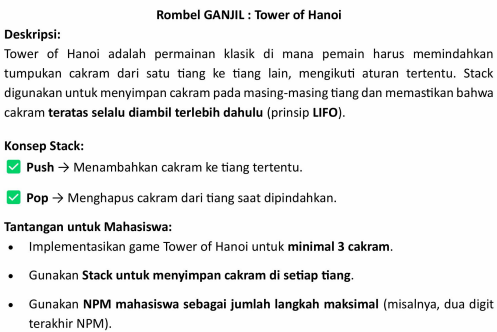

In [3]:
# Variabel
is_autoplay = False
is_playing = False
tower_height = 3
tower_width = 0
object_visuals = {}

# Class
class Tower:
  def __init__(self):
    self.stack = []

  def __iter__(self):
    for v in self.stack:
      yield v

  def __repr__(self):
    return str(self.stack)

  def peek(self):
    if len(self.stack) == 0:
      return
    return self.stack[-1]

  def push(self, new_data):
    self.stack.append(new_data)

  def pop(self):
    if len(self.stack) == 0:
      return
    return self.stack.pop()

class TowerOfHanoi:
  def __init__(self):
    self.is_finished = False
    self.towers = [Tower(), Tower(), Tower()]
    self.towers[0].stack = list(range(tower_height, 0, -1))

  def visualize(self):
    visual = ""

    for y in range(tower_height):
      line = ""
      for tower in self.towers:
        try:
          line = f"{line}{object_visuals[tower.stack[y]].center(tower_width)}"
        except:
          line = f"{line}{'|'.center(tower_width)}"
      visual = f"{line}\n{visual}"

    print(f"{visual}{'=' * len(self.towers) * tower_width}")

  def step(self, origin, target):
    try:
      origin_tower = self.towers[origin - 1]

      if len(origin_tower.stack) == 0:
        return

      target_tower = self.towers[target - 1]
      target_tower.push(origin_tower.peek())
      origin_tower.pop()
      game.visualize()

      if target == 3 and target_tower.stack == list(range(tower_height, 0, -1)):
        self.is_finished = True
        print("Menang!")
    except:
      print("Kesalahan dalam pemindahan cakram")


# Fungsi
def autoplay(n, source, helper, target):
  if n > 0:
    autoplay(n - 1, source, target, helper)
    if game.towers[source - 1].stack:
      game.step(source, target)
      print("")
    autoplay(n - 1, helper, source, target)


# Inisialisasi game
print("""Tower of hanoi adalah permainan atau teka-teki matematika yang terdiri dari tiga batang dan sejumlah cakram dengan berbagai diameter, yang dapat digeser ke batang mana pun.
Teka-teki dimulai dengan piringan-piringan yang ditumpuk pada satu batang dengan urutan mengecil, yang terkecil di bagian atas, sehingga mendekati bentuk kerucut.
""")

tower_height = int(input("Masukkan jumlah cakram: "))

temp = 1
for i in range(1, tower_height + 1, 1):
  object_visuals[i] = "-" * temp
  temp = temp + 2
  tower_width = temp
del temp

game = TowerOfHanoi()

print("")

if input("Mulai bermain? Y/N\n").lower() == "y":
  is_playing = True

print("")

if input("Main otomatis? Y/N\n").lower() == "y":
  is_autoplay = True

if is_playing:
  print("Permainan dimulai. Ketik \033[96mstop\033[0m untuk menghentikan permainan\n")
  game.visualize()
  print("")

if is_autoplay:
  autoplay(tower_height, 1, 2, 3)


# Loop utama
while is_playing and not is_autoplay:
  if game.is_finished:
    break

  try:
    user_input = input("Pindahkan cakram dari tiang ke berapa menuju tiang ke berapa (contoh: 1 2):\n")

    if user_input == "stop":
      break

    user_input = user_input.split(" ")
    game.step(int(user_input[0]), int(user_input[1]))
    print("")
  except:
    print("Kesalahan input")

Tower of hanoi adalah permainan atau teka-teki matematika yang terdiri dari tiga batang dan sejumlah cakram dengan berbagai diameter, yang dapat digeser ke batang mana pun.
Teka-teki dimulai dengan piringan-piringan yang ditumpuk pada satu batang dengan urutan mengecil, yang terkecil di bagian atas, sehingga mendekati bentuk kerucut.

Masukkan jumlah cakram: 3

Mulai bermain? Y/N
y

Main otomatis? Y/N
y
Permainan dimulai. Ketik stop untuk menghentikan permainan

   -      |      |   
  ---     |      |   
 -----    |      |   

   |      |      |   
  ---     |      |   
 -----    |      -   

   |      |      |   
   |      |      |   
 -----   ---     -   

   |      |      |   
   |      -      |   
 -----   ---     |   

   |      |      |   
   |      -      |   
   |     ---   ----- 

   |      |      |   
   |      |      |   
   -     ---   ----- 

   |      |      |   
   |      |     ---  
   -      |    ----- 

   |      |      -   
   |      |     ---  
   |      |    -----